In [5]:
from IPython.display import display
import pandas as pd

def VegaLite(spec):
    bundle = {}
    bundle['application/vnd.vegalite.v4+json'] = spec
    display(bundle, raw=True)

In [3]:
report_dk = [{"value": 27, "product": "Subsistances", "destination": "fr"}, 
             {"value": 7, "product": "Subsistances", "destination": "colonies"}, 
             {"value": 37, "product": "Matières premières", "destination": "fr"}, 
             {"value": 70, "product": "Matières premières", "destination": "colonies"}, 
             {"value": 20, "product": "Drogues", "destination": "fr"}, 
             {"value": 29, "product": "Drogues", "destination": "colonies"}, 
            ]

In [16]:
import json

with open("data/export_dunkerque_entreprôt.json", "r") as f:
    report_dk = json.load(f)

In [18]:
report_dk[:2]

[{'value': 14934610.600140002,
  'product': 'Subsistances',
  'destination': 'entrepôt'},
 {'value': 15432.399860000001,
  'product': 'Subsistances',
  'destination': 'France'}]

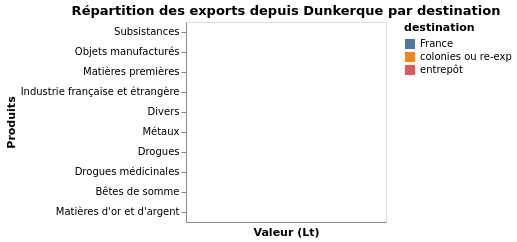

In [24]:
VegaLite({
  "title": "Répartition des exports depuis Dunkerque par destination",
  "data": {"values": report_dk},
  "mark": {"type":"bar", "tooltip": {"content": "data"}},
  "encoding": {
    "x": {"field": "value", "type": "quantitative", "title": "Valeur (Lt)", "scale": {"type": "log"}},
    "y": {"field": "product", "sort": "-x", "title": "Produits"},
    "color": {"field": "destination"}
  }
})